In [390]:
#! pip install pandas
#! pip install seaborn
#! pip install scikit-learn
#! pip install --upgrade pip

In [391]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import sklearn as skl

In [392]:
#Carregar os dados
df_house = pd.read_csv('./dataset/houses.csv')

In [393]:
# Checar o arquivo
# variável target house
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [394]:
# Remover a coluna id
df_house.drop(columns=['id'], axis=1, inplace=True)

In [395]:
# Renomear as colunas para retirar acentos, espaços e caracteres maiúsculos e minúsculos
df_house.columns = [
    'tamanho',
    'numero_de_quartos',
    'anos_de_uso',
    'garagem',
    'localizacao_periferica',
    'localizacao_suburbio',
    'valor_do_aluguel'
    ]

In [396]:
# Bucket - Trasnforma uma variavel numerica em uma variavel categorica
# Copiar os dataframes
df_house_eda = df_house.copy() 

In [397]:
# Copiar a cópia do df_house para DF Bucketing para criar colunas novas
df_house_bucketing = df_house.copy()

### Substituindo Valores Ausentes

In [398]:
df_house_eda.head(10)

,tamanho,numero_de_quartos,anos_de_uso,garagem,localizacao_periferica,localizacao_suburbio,valor_do_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
5,73.399178,5,8.747746,1,True,False,2141.303241
6,58.712542,3,49.108417,1,True,False,1625.680981
7,179.926422,5,25.831795,0,False,True,2854.591908
8,140.167252,4,13.041459,1,True,False,2702.673542
9,156.210887,5,49.812685,1,False,False,2456.538289


In [399]:
df_house_eda.numero_de_quartos.unique()

array([1, 4, 5, 3, 2])

In [400]:
df_house_eda.garagem.unique()

array([0, 1])

In [401]:
df_house_eda.garagem.unique()

array([0, 1])

In [402]:
df_house_eda.isna().sum()

tamanho                   0
numero_de_quartos         0
anos_de_uso               0
garagem                   0
localizacao_periferica    0
localizacao_suburbio      0
valor_do_aluguel          0
dtype: int64

In [403]:
# Detectar os valores ausentes
df_house_eda[['garagem', 'localizacao_periferica']]

,garagem,localizacao_periferica
0,0,True
1,1,True
2,1,True
3,1,False
4,0,False
...,...,...
95,1,False
96,1,True
97,0,False
98,1,False


In [404]:
# Medidas Estatísticas do DF
df_house_eda.describe()

,tamanho,numero_de_quartos,anos_de_uso,garagem,valor_do_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


In [405]:
# Estrutura do DataFrame
df_house_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tamanho                 100 non-null    float64
 1   numero_de_quartos       100 non-null    int64  
 2   anos_de_uso             100 non-null    float64
 3   garagem                 100 non-null    int64  
 4   localizacao_periferica  100 non-null    bool   
 5   localizacao_suburbio    100 non-null    bool   
 6   valor_do_aluguel        100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [406]:
df_house_eda.head(10)

,tamanho,numero_de_quartos,anos_de_uso,garagem,localizacao_periferica,localizacao_suburbio,valor_do_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
5,73.399178,5,8.747746,1,True,False,2141.303241
6,58.712542,3,49.108417,1,True,False,1625.680981
7,179.926422,5,25.831795,0,False,True,2854.591908
8,140.167252,4,13.041459,1,True,False,2702.673542
9,156.210887,5,49.812685,1,False,False,2456.538289


<Axes: xlabel='tamanho'>

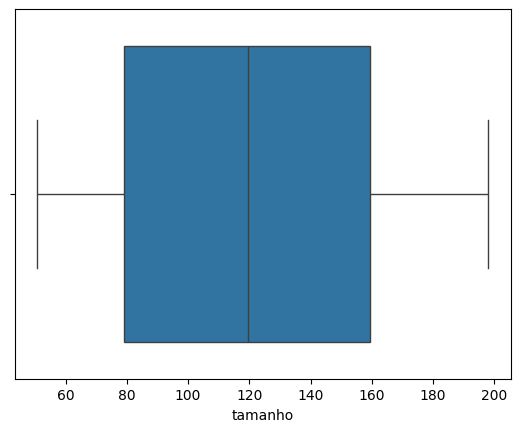

In [407]:
# Verificar e detectar outliers idade
sns.boxplot(data=df_house_eda, x='tamanho')

<Axes: xlabel='anos_de_uso'>

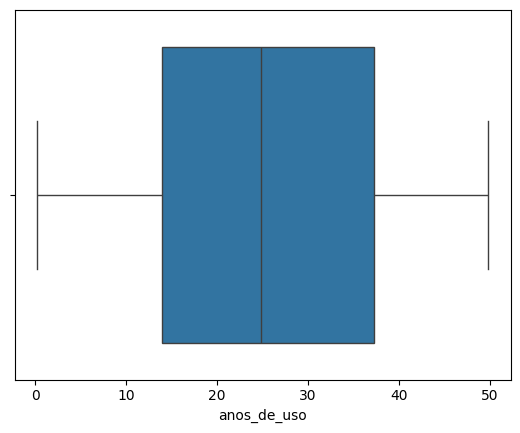

In [408]:
# Verificar e detectar outliers para Peso
sns.boxplot(data=df_house_eda, x='anos_de_uso')

<Axes: xlabel='valor_do_aluguel'>

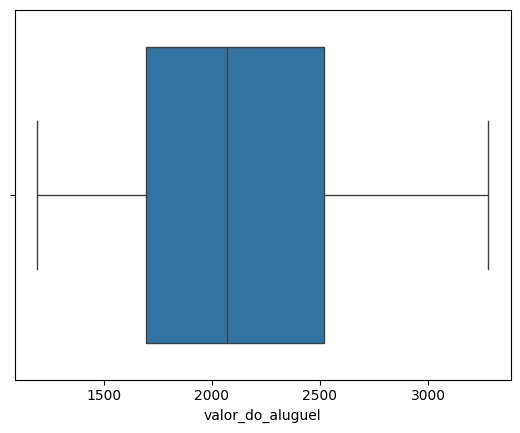

In [409]:
# Verificar e detectar outliers para Peso
sns.boxplot(data=df_house_eda, x='valor_do_aluguel')

In [410]:
df_house_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tamanho                 100 non-null    float64
 1   numero_de_quartos       100 non-null    int64  
 2   anos_de_uso             100 non-null    float64
 3   garagem                 100 non-null    int64  
 4   localizacao_periferica  100 non-null    bool   
 5   localizacao_suburbio    100 non-null    bool   
 6   valor_do_aluguel        100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [411]:
# Converter variável categórica ordinal em numérica, usando factorize do Pandas
df_house_eda['localizacao_periferica'] = pd.factorize(df_house_eda.localizacao_periferica)[0]
df_house_eda['localizacao_suburbio'] = pd.factorize(df_house_eda.localizacao_suburbio)[0]
df_house_eda['anos_de_uso'] = df_house_eda['anos_de_uso'].astype(int)

In [412]:
df_house_eda.head()

,tamanho,numero_de_quartos,anos_de_uso,garagem,localizacao_periferica,localizacao_suburbio,valor_do_aluguel
0,106.181018,1,36,0,0,0,1767.122088
1,192.607146,4,10,1,0,0,3278.742397
2,159.799091,5,27,1,0,0,2953.899737
3,139.798773,4,34,1,1,1,2514.717108
4,73.402796,5,11,0,1,1,1942.164396


### Análise Gráfica - Variáveis Categóricas x Target

<Axes: xlabel='numero_de_quartos', ylabel='valor_do_aluguel'>

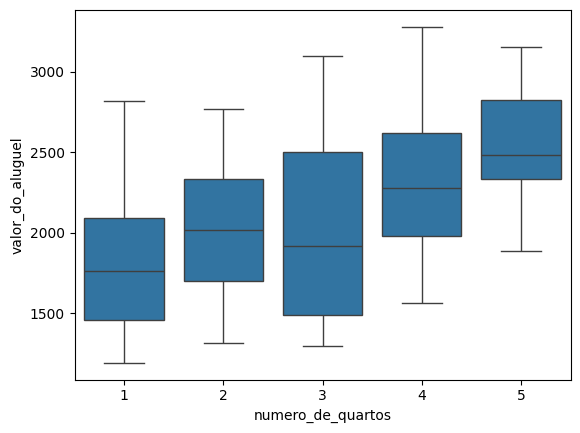

In [413]:
# Cruzamento de Variáveis Categóricas com Nível de house
sns.boxplot(data=df_house_eda, x='numero_de_quartos', y='valor_do_aluguel')

In [414]:
# Bucketing - Analisando Variáveis por Intervalos de Classe

bins_anos_casa = [0,8,16,24,32,40,48,56]
escala_anos_de_uso = ['0--7', '8--15', '16--24', '25--32','33--40', '41--48', '49--57']
df_house_bucketing['escala_idade'] = pd.cut(x = df_house['anos_de_uso'],bins = bins_anos_casa, labels=escala_anos_de_uso, include_lowest=True)
#df_house_bucketing['escala_idade'] = pd.cut(x = df_house['anos_de_uso'],bins = labels_idade, labels=labels_idade, include_lowest=True)


In [415]:
df_house_bucketing.head()

,tamanho,numero_de_quartos,anos_de_uso,garagem,localizacao_periferica,localizacao_suburbio,valor_do_aluguel,escala_idade
0,106.181018,1,36.760806,0,True,False,1767.122088,33--40
1,192.607146,4,10.453581,1,True,False,3278.742397,8--15
2,159.799091,5,27.072399,1,True,False,2953.899737,25--32
3,139.798773,4,34.789220,1,False,True,2514.717108,33--40
4,73.402796,5,11.427501,0,False,True,1942.164396,8--15


<Axes: xlabel='escala_idade', ylabel='valor_do_aluguel'>

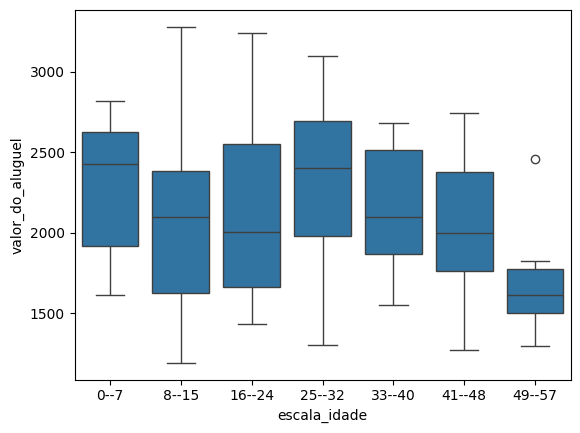

In [416]:
# Cruzamento de Variáveis Categóricas com Nível de house
sns.boxplot(data=df_house_bucketing, x='escala_idade', y='valor_do_aluguel')

<Axes: xlabel='numero_de_quartos', ylabel='valor_do_aluguel'>

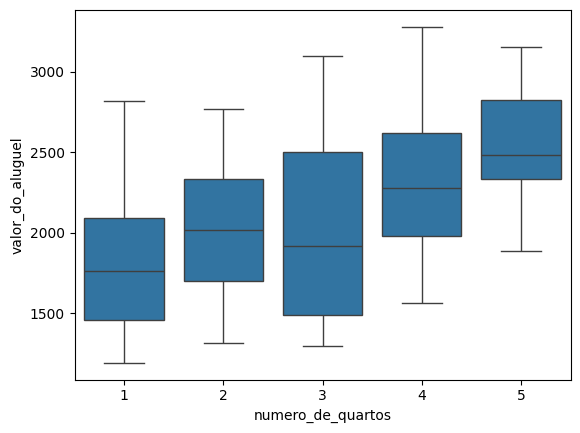

In [417]:
# Cruzamento de Variáveis Categóricas com Nível de house
sns.boxplot(data=df_house_bucketing, x='numero_de_quartos', y='valor_do_aluguel')

In [418]:
df_house_eda.head()

,tamanho,numero_de_quartos,anos_de_uso,garagem,localizacao_periferica,localizacao_suburbio,valor_do_aluguel
0,106.181018,1,36,0,0,0,1767.122088
1,192.607146,4,10,1,0,0,3278.742397
2,159.799091,5,27,1,0,0,2953.899737
3,139.798773,4,34,1,1,1,2514.717108
4,73.402796,5,11,0,1,1,1942.164396


<Axes: xlabel='localizacao_periferica', ylabel='valor_do_aluguel'>

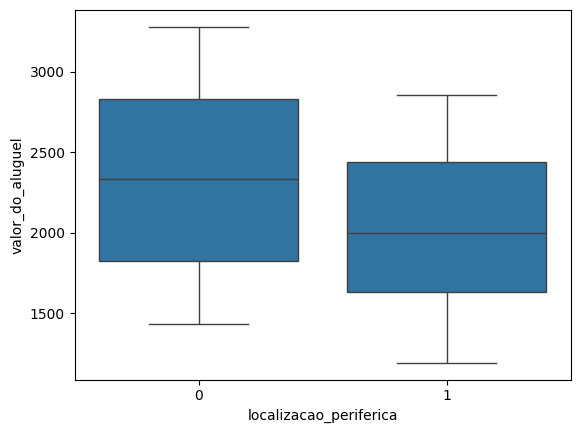

In [419]:
# Cruzamento de Variáveis Categóricas com Nível de house
sns.boxplot(data=df_house_eda, x='localizacao_periferica', y='valor_do_aluguel')

### Análise Gráfica - Variáveis Numéricas

<Axes: xlabel='anos_de_uso', ylabel='valor_do_aluguel'>

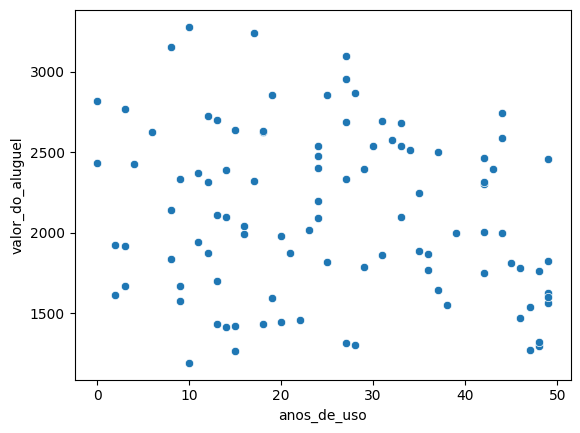

In [420]:
# Diagrama de Dispersão - Cruzamento Variáveis numéricas com nível de house
sns.scatterplot(data=df_house_eda, x='anos_de_uso', y='valor_do_aluguel')

<Axes: xlabel='tamanho', ylabel='valor_do_aluguel'>

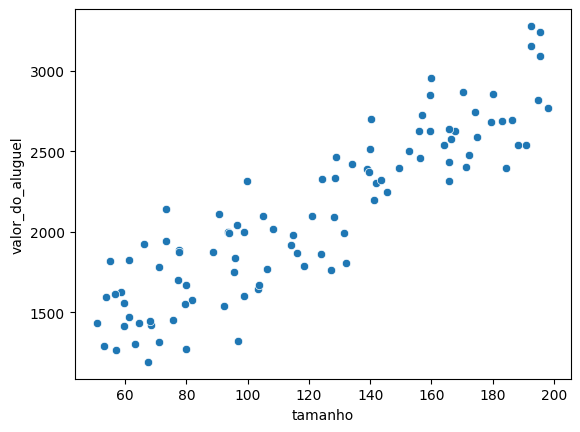

In [421]:
sns.scatterplot(data=df_house_eda, x='tamanho', y='valor_do_aluguel')

### Anaise Gráfica - Histogramas

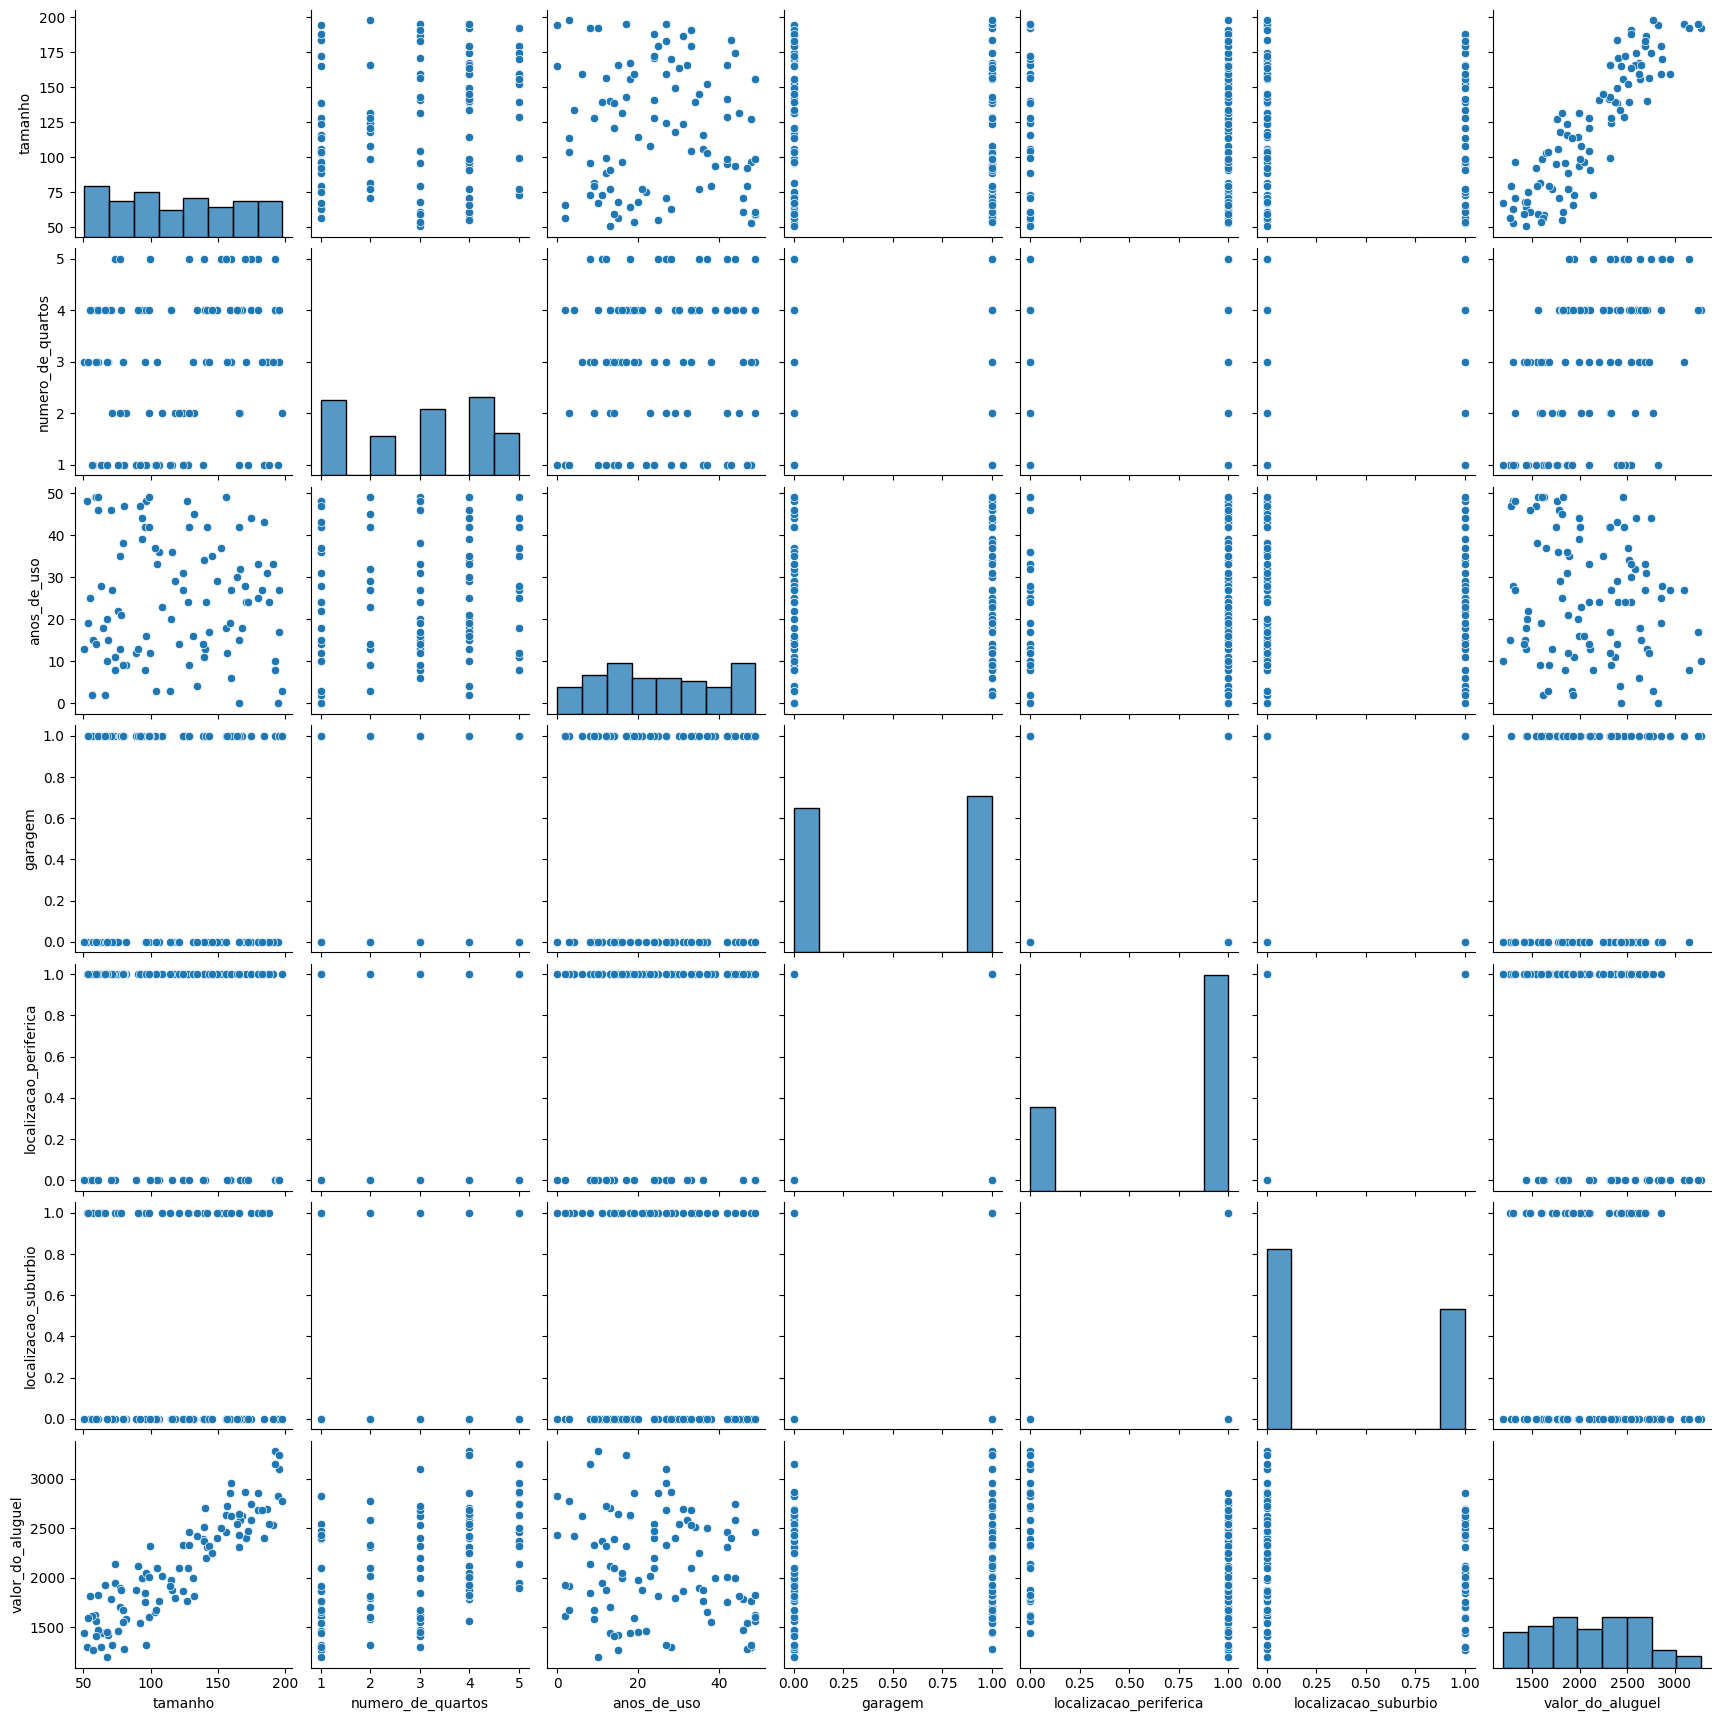

In [422]:
sns.pairplot(df_house_eda)

### Análise de Correlação

In [423]:
df_house_eda.head(10)

,tamanho,numero_de_quartos,anos_de_uso,garagem,localizacao_periferica,localizacao_suburbio,valor_do_aluguel
0,106.181018,1,36,0,0,0,1767.122088
1,192.607146,4,10,1,0,0,3278.742397
2,159.799091,5,27,1,0,0,2953.899737
3,139.798773,4,34,1,1,1,2514.717108
4,73.402796,5,11,0,1,1,1942.164396
5,73.399178,5,8,1,0,0,2141.303241
6,58.712542,3,49,1,0,0,1625.680981
7,179.926422,5,25,0,1,1,2854.591908
8,140.167252,4,13,1,0,0,2702.673542
9,156.210887,5,49,1,1,0,2456.538289


<Axes: >

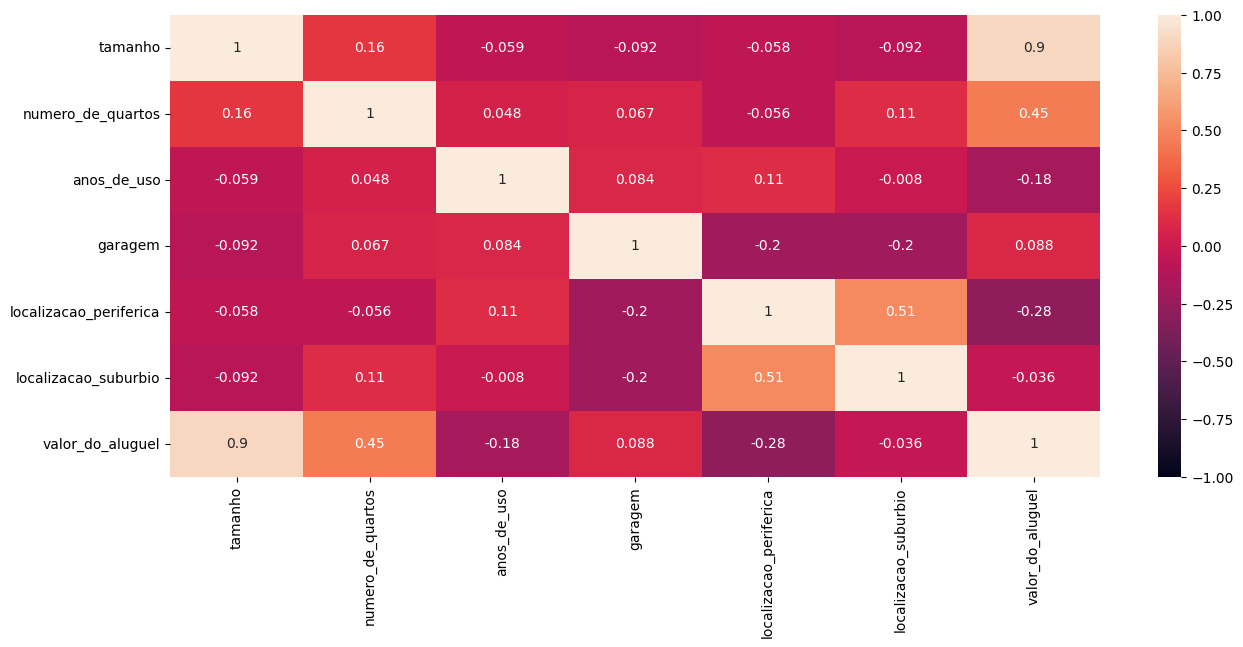

In [424]:
# Mapa de Calor com Correlação entre as variáveis

plt.figure(figsize=(15,6))
sns.heatmap(df_house_eda.corr(), vmin=-1, vmax=1, annot=True )

<Axes: >

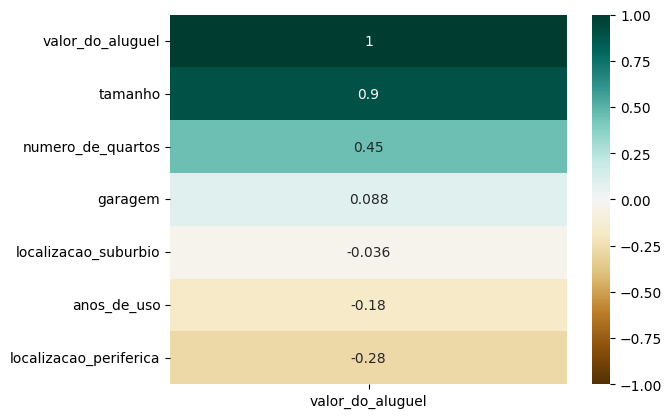

In [425]:
# Formato de Hanking, somente correlação com a Variável Target (Nível house)
sns.heatmap(df_house_eda.corr()[['valor_do_aluguel']].sort_values(by='valor_do_aluguel', ascending=False ), vmin=-1, vmax=1, annot=True, cmap='BrBG')

### Análise Gráfica com Bucketing

In [426]:
df_house_bucketing.head(10)

,tamanho,numero_de_quartos,anos_de_uso,garagem,localizacao_periferica,localizacao_suburbio,valor_do_aluguel,escala_idade
0,106.181018,1,36.760806,0,True,False,1767.122088,33--40
1,192.607146,4,10.453581,1,True,False,3278.742397,8--15
2,159.799091,5,27.072399,1,True,False,2953.899737,25--32
3,139.798773,4,34.789220,1,False,True,2514.717108,33--40
4,73.402796,5,11.427501,0,False,True,1942.164396,8--15
5,73.399178,5,8.747746,1,True,False,2141.303241,8--15
6,58.712542,3,49.108417,1,True,False,1625.680981,49--57
7,179.926422,5,25.831795,0,False,True,2854.591908,25--32
8,140.167252,4,13.041459,1,True,False,2702.673542,8--15
9,156.210887,5,49.812685,1,False,False,2456.538289,49--57


<Axes: xlabel='escala_idade', ylabel='valor_do_aluguel'>

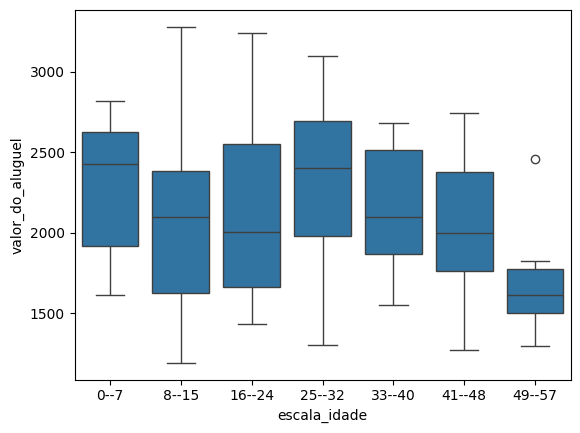

In [427]:
sns.boxplot(df_house_bucketing, x = 'escala_idade', y='valor_do_aluguel')

### Preparação do Dataset Treino e Teste

In [428]:
# Usando Pipeline do Sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import sklearn
print(sklearn.__version__)

1.4.2


In [429]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tamanho                 100 non-null    float64
 1   numero_de_quartos       100 non-null    int64  
 2   anos_de_uso             100 non-null    float64
 3   garagem                 100 non-null    int64  
 4   localizacao_periferica  100 non-null    bool   
 5   localizacao_suburbio    100 non-null    bool   
 6   valor_do_aluguel        100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [430]:
# Gerando as variáveis
X = df_house.drop(columns='valor_do_aluguel', axis=1)
y = df_house['valor_do_aluguel']

In [431]:
# Split do DataSet para Treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=51)


In [432]:
y_test.shape

(50,)

In [433]:
# Criar um Pipeline
# imputar valores ausentes nas variáveis categóricas - grupo_sanquineo, fumante, nivel_atividade_fisica
# Padronizar variáveis numéricas - Standardzar Z-score - idade, altura, peso
# OneHotEconde nas variáveis categóricas nominais - grupo_sanguineo, fumante
# OrdinalEncoder nas variáveis categóricas ordinais - nivel_atividade_fisica
# imputar mediana nas variáveis numéricas - idade, altura, peso


# 1 - Criar 


colunas_categoricas = ['localizacao_periferica','localizacao_suburbio','garagem']
colunas_numericas = ['tamanho','anos_de_uso',]
colunas_ordinais = ['numero_de_quartos']

In [434]:
# Transformer Categóricas

transformer_categoricas = Pipeline(steps=[
    ( 'imputer', SimpleImputer(strategy='most_frequent') ),
    ( 'onehot', OneHotEncoder(handle_unknown='ignore') )
    
])

In [435]:
# Transformer Ordinais

transformer_ordinais = Pipeline(steps=[
    ( 'imputer', SimpleImputer(strategy='most_frequent') ),
    ( 'ordinal', OrdinalEncoder( categories = [['Baixo','Moderado','Alto']], handle_unknown='error') )
])

In [436]:
# Transformer Numéricas

transformer_numericas = Pipeline(steps=[
    ( 'imputer', SimpleImputer(strategy='median') ),
    ( 'scaler', StandardScaler())
])

In [437]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers = [
        ( 'num', transformer_numericas, colunas_numericas ),
        ( 'cat', transformer_categoricas, colunas_categoricas ),
        #( 'ord', transformer_ordinais, colunas_ordinais )
    ]
)

### Treinamento do Modelo com Pipelines

In [438]:
# Criando o Pipeline Principal = Pre Prcessamento + Treinamento

model_regr = Pipeline(steps = [('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

In [439]:
# Treinar Modelo

model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tamanho', 'anos_de_uso']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['localizacao_periferica',
                                                   'localizacao_suburbio',
                                                   'garagem'])])),
                ('regressor', LinearRegression())])

## Validação do Modelo

### Análise de Métricas

In [440]:
# Analisar o R2 Score para analisar se:
# A variancia dos dados das variáveis independentes é explicado pelas variáveis independentes
# Analisar o Mean Absolute Error (Erro médio absoluto entre o valor predito e o valor real)
# Analisar o Mean Squared Error mais precisamente o Root Mean Squared Error

# Gerar a predição

y_pred = model_regr.predict(X_test)



In [441]:
# Calcular o R2 Score

r2_score(y_test, y_pred)

np.float64(0.920611935284297)

In [442]:
# Calcular MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

np.float64(134.5216882812021)

In [443]:

mean_squared_error(y_test, y_pred, squared=False)


/Users/jamilly/.local/share/virtualenvs/IA_rent_house_predict-jgEQ1Xtw/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(159.18462400909758)

### Análise Gráfica de Resíduos

In [444]:

residuos = y_test - y_pred



In [445]:
# Transformar os Residuos na escala padrão Z
# (X - Média / Desvio Padrão)
#! pip install scipy
#! pip uninstally numpy

from scipy.stats import zscore
# import numpy as np
# print(scipy.__version__)
# print(np.__version__)

residuos_std = zscore(residuos)



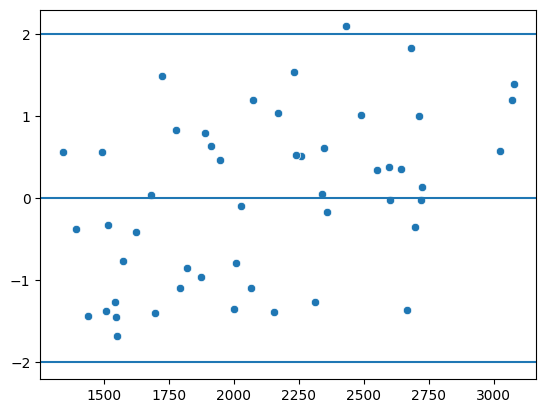

In [446]:
# Verificar linearidade dos residups: Valores entre -2 e +2
# Verificar homocedasticidade: Valores em torno da reta
# Verificar linearidade dos residups: Valores entre -2 e +2
# Verificar homocedasticidade: Valores em torno da reta


sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)



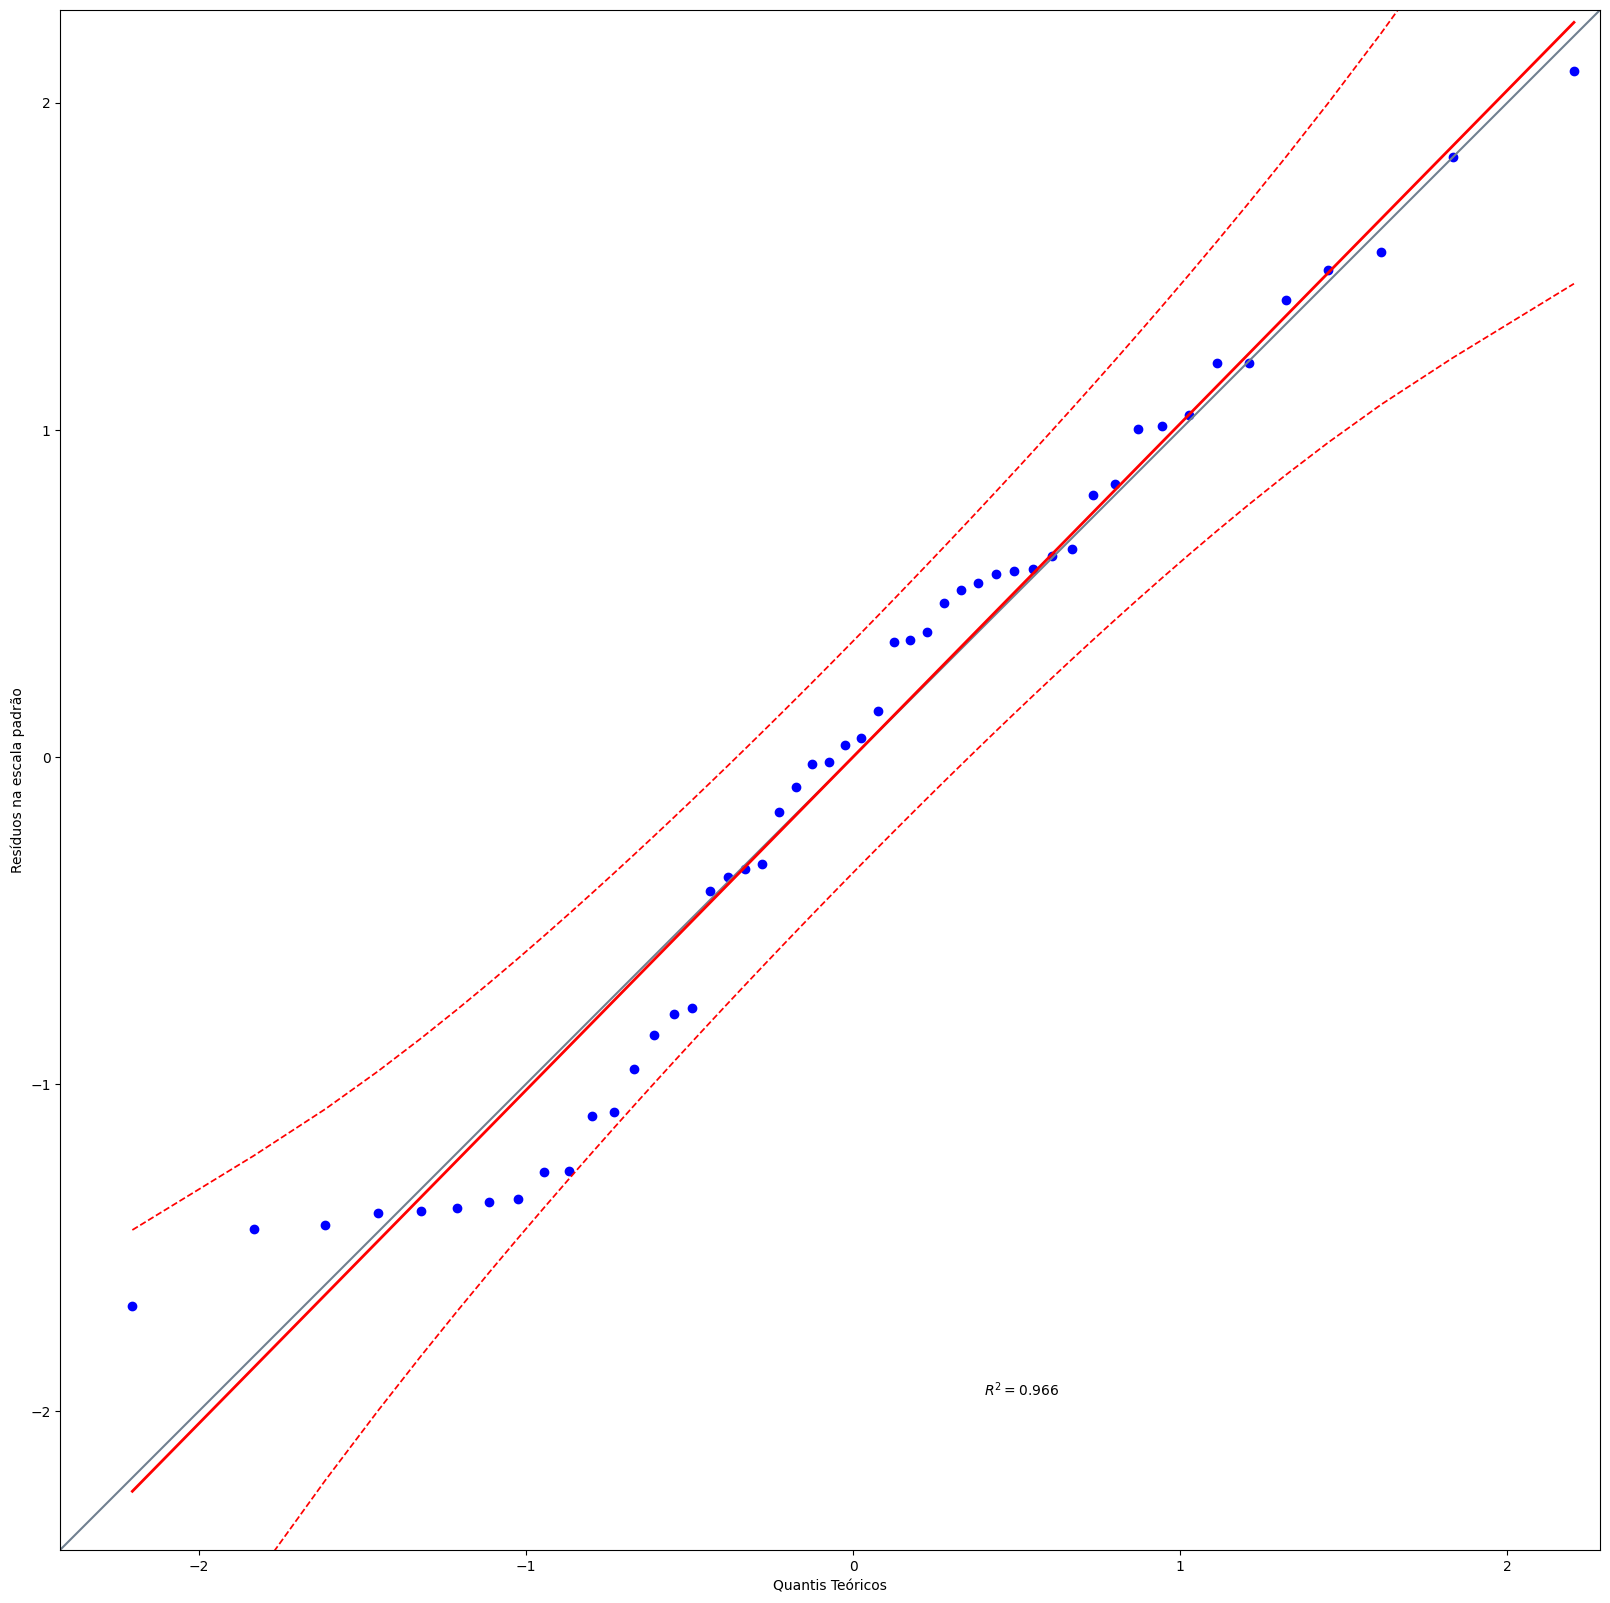

In [447]:
# Confirmar se a homogeneidade da variância entre os residuos e as variaveis preditivas está acontecendo
# Testando a Normalidade dos Resíduos - ver se os residuos seguem um distribuição normal
# usando QQ Plot
# ! pip install pingouin
#! pip install matplotlib.plt

import pingouin as pg
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

### Teste de Normalidade dos Resíduos

In [448]:
# Teste de Normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, p_value_shapiro = shapiro(residuos)
print('Estatística do Teste: {} e P-Value: {}'.format(stat_shapiro, p_value_shapiro))

# P-Value tem que ser maior que 0.005, nesse caso a gente poderia rejeitar a hipótese nula, ou seja:
# os resíduos não seguem uma distribuição normal, porque o P-Value está abaixo de 0.005 

Estatística do Teste: 0.9557776267038529 e P-Value: 0.05918935002674056


In [449]:
# Teste de Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print('Estatística do Teste: {} e P-Value: {}'.format(stat_ks, p_value_ks))

# Não há normalidade nos resíduos, devemos rejeitar a Hipótese Nula (H0)

Estatística do Teste: 0.52 e P-Value: 4.2088486320410837e-13


In [450]:
# Teste de Lilliefors

stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print('Estatística do Teste: {} e P-Value: {}'.format(stat_ll, p_value_ll))
# P-Value tem que ser maior que 0.005, nesse caso a gente aceita a hipótese nula, ou seja:
# os resíduos seguem uma distribuição normal, porque o P-Value está acima de 0.005 

Estatística do Teste: 0.09914102025056976 e P-Value: 0.24690228999173355


In [451]:
# Teste de Anderson-Darling
stat_and, critical_and, signigicance_and= anderson(residuos, dist='norm')
# print('Estatística do Teste: {} e P-Value: {}'.format(stat_ands, p_value_ll))

In [452]:
critical_and

array([0.538, 0.613, 0.736, 0.858, 1.021])

In [453]:
signigicance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [454]:
print('Estatística do Teste: {} e Valor Crítico: {}'.format(stat_and, critical_and[2]))
# Ovalor da Estatística do Teste é maior que o valor crítico, deve-se rejeitar h0 e os resíduos não seguem a dist. normal

Estatística do Teste: 0.6879262409833942 e Valor Crítico: 0.736


### Teste de Homocedasticidades dos Resíduos | Goldfeld-Quandt

In [455]:
# Comparar os resíduos contra o conjunto de testes
# O objetico do teste é avaliar a homogeneidade dos resíduos e do nosso conjunto de variáveis independentes
# Os residuos estao sendo baseados nas variaiveis de teste

pipe = Pipeline(steps =[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [456]:
X_test_transformed

array([[-0.94395932, -1.12346947,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ],
       [ 1.52314303,  0.40541842,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ],
       [ 1.7334996 ,  0.13755279,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ],
       [-1.41320328, -0.76519172,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ],
       [-0.38933351, -1.53706234,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ],
       [-0.62276786,  1.26846532,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ],
       [ 1.36268531,  0.52490514,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ],
       [-1.0921964 , -0.99427547,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ],
       [-1.23158912, -1.06165896

In [457]:
test_goldfelf = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfelf[0]
p_value_goldfeld = test_goldfelf[1]
print('Estatística do Teste: {} e P-Value: {}'.format(stat_goldfeld, p_value_goldfeld))

# P-Value tem que ser maior que 0.005, nesse caso a gente aceita a hipótese nula, ou seja:
# os resíduos seguem uma distribuição normal, porque o P-Value está acima de 0.005 


Estatística do Teste: 0.7000755707018935 e P-Value: 0.7778571391521925


### Predição de Valores e Salvando os Modelos

In [458]:
predicao_individual = {
    'tamanho' : 106.181,
    'numero_de_quartos' : 1,
    'anos_de_uso': 36.76,
    'garagem': 0,
    'localizacao_periferica' : 'True',
    'localizacao_suburbio': 'False'}
sample_df = pd.DataFrame(predicao_individual, index=[1])

In [459]:
sample_df


,tamanho,numero_de_quartos,anos_de_uso,garagem,localizacao_periferica,localizacao_suburbio
1,106.181,1,36.76,0,True,False


In [460]:
# Predição
model_regr.predict(sample_df)

array([1955.6578908])

In [461]:
import joblib

In [462]:
# Salvar Modelo
joblib.dump(model_regr, './modelo_house.pkl')

['./modelo_house.pkl']